In [1]:
import math
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
from urllib.request import urlopen

In [2]:
chess = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/chess-transfers/transfers.csv')

In [5]:
chess.url[0]

'https://ratings.fide.com/fedchange.phtml?year=2000'

In [3]:
del chess['url']

In [4]:
count_df=pd.DataFrame()

In [5]:
count_df['Federation']=chess.Federation.value_counts().index

In [6]:
count_df['transfer_count']=chess.Federation.value_counts().values

<AxesSubplot:xlabel='Federation'>

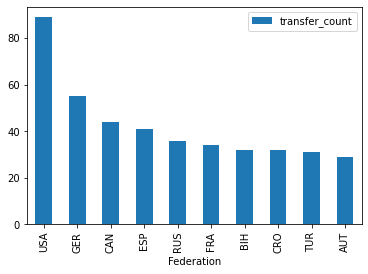

In [7]:
count_df.head(10).plot.bar(x='Federation',y='transfer_count')

In [8]:
count_dict=chess.value_counts(['Form.Fed','Federation']).to_dict()

In [9]:
count_dict={k:v for k,v in count_dict.items() if v>=5}

In [67]:
import networkx as nx
import matplotlib.pyplot as plt


In [11]:
dg = nx.DiGraph()

In [12]:
for k,v in count_dict.items():
    dg.add_edge(k[0],k[1],weight=v)

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

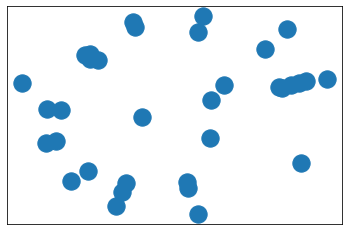

In [14]:
nx.draw_networkx(dg)

In [2]:


nba= pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')

In [3]:
nba.columns

Index(['Unnamed: 0', 'EVENTMSGACTIONTYPE', 'EVENTMSGTYPE', 'EVENTNUM',
       'GAME_ID', 'HOMEDESCRIPTION', 'NEUTRALDESCRIPTION', 'PCTIMESTRING',
       'PERIOD', 'PERSON1TYPE', 'PERSON2TYPE', 'PERSON3TYPE', 'PLAYER1_ID',
       'PLAYER1_NAME', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER1_TEAM_CITY',
       'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_NICKNAME', 'PLAYER2_ID',
       'PLAYER2_NAME', 'PLAYER2_TEAM_ABBREVIATION', 'PLAYER2_TEAM_CITY',
       'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_NICKNAME', 'PLAYER3_ID',
       'PLAYER3_NAME', 'PLAYER3_TEAM_ABBREVIATION', 'PLAYER3_TEAM_CITY',
       'PLAYER3_TEAM_ID', 'PLAYER3_TEAM_NICKNAME', 'SCORE', 'SCOREMARGIN',
       'VISITORDESCRIPTION', 'WCTIMESTRING'],
      dtype='object')

In [4]:
nba=nba.loc[:,['PLAYER1_ID', 'PLAYER1_NAME', 'PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER3_ID', 'PLAYER3_NAME']]

In [5]:
nba.loc[(nba.PLAYER3_NAME.notnull())&(nba.PLAYER2_NAME.isnull()),['PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER3_ID', 'PLAYER3_NAME']]=nba.loc[(nba.PLAYER3_NAME.notnull())&(nba.PLAYER2_NAME.isnull()),['PLAYER3_ID', 'PLAYER3_NAME', 'PLAYER2_ID', 'PLAYER2_NAME']].values

In [6]:
nba_2=nba.loc[(nba.PLAYER2_NAME.notnull())&(nba.PLAYER3_NAME.isnull())]

In [7]:
nba_3=nba.loc[(nba.PLAYER3_NAME.notnull())]

In [8]:
nba_2_df=nba_2.value_counts(['PLAYER1_ID','PLAYER2_ID']).to_frame().reset_index().rename(columns={0:'counts'})

nba_3_df_12=nba_3.value_counts(['PLAYER1_ID','PLAYER2_ID']).to_frame().reset_index().rename(columns={0:'counts'})

nba_3_df_13=nba_3.value_counts(['PLAYER1_ID','PLAYER3_ID']).to_frame().reset_index().rename(columns={0:'counts','PLAYER3_ID':'PLAYER2_ID'})

nba_3_df_23=nba_3.value_counts(['PLAYER2_ID','PLAYER3_ID']).to_frame().reset_index().rename(columns={0:'counts','PLAYER2_ID':'PLAYER1_ID','PLAYER3_ID':'PLAYER2_ID'})

In [9]:
count_df=pd.concat([nba_2_df,nba_3_df_12,nba_3_df_13,nba_3_df_23])

In [10]:
all_counts_df=count_df.groupby(['PLAYER1_ID','PLAYER2_ID']).counts.sum().to_frame()

In [11]:
all_counts_df=all_counts_df.sort_values('counts',ascending=False).reset_index()

In [12]:
all_counts_df=all_counts_df.loc[all_counts_df.counts>=75]

In [72]:
all_counts_df

,PLAYER1_ID,PLAYER2_ID,counts
0,203991,201935,230
1,203500,201566,223
2,202696,201571,193
3,202331,201566,188
4,1626149,101150,186
...,...,...,...
158,204456,1627732,76
159,1627783,1628384,75
160,200752,202722,75
161,201960,203915,75


In [13]:
from igraph import *

In [14]:
g = Graph()

In [15]:
all_ids=list(set(np.append(all_counts_df.PLAYER1_ID.unique(),all_counts_df.PLAYER2_ID.unique())))

In [16]:
for player_id in all_ids:
    g.add_vertices(player_id)

In [17]:
for row in all_counts_df.itertuples():
    g.add_edge(row.PLAYER1_ID,row.PLAYER2_ID)

In [ ]:
g.layout() ### this causes kernel is died error

In [3]:
with urlopen('https://www.gutenberg.org/files/1400/1400-0.txt') as f:
    raw = f.read()

greatExpectations = raw[1900:1039269].decode('utf8')


In [ ]:
greatExpectations

In [5]:
import nltk

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/mehmetali/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
tokenized_text=nltk.sent_tokenize(greatExpectations)

In [21]:
tokenized_text[1]

'So, I called myself Pip, and came to be called Pip.'

In [19]:
tokenized_text

In [22]:
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''


In [25]:
for i in range(len(tokenized_text)):
    for w in tokenized_text[i]:
        if w in punc:
            tokenized_text[i]=tokenized_text[i].replace(w,"")

In [31]:

names = [
 'Joe',
 'Pip',
 'Wopsle',
 'Hubble',
 'Pumblechook',
 'Richard',
 'Wopsle',
 'Biddy',
 'Havisham',
 'Joseph',
 'Sarah',
 'Estella',
 'Orlick',
 'Mike',
 'Wemmick',
 'Herbert',
 'Pocket',
 'Jane',
 'Flopson',
 'Coiler',
 'Drummle',
 'Jack',
 'Spider',
 'Handel',
 'Herbert',
 'Clara',
 'Skiffins',
 'Magwitch',
 'Provis',
 'Compeyson',
 'Tom',
 'Bill',
 'Barley',
 'Orlick',
 'William']

names = np.array(sorted(names))
names



array(['Barley', 'Biddy', 'Bill', 'Clara', 'Coiler', 'Compeyson',
       'Drummle', 'Estella', 'Flopson', 'Handel', 'Havisham', 'Herbert',
       'Herbert', 'Hubble', 'Jack', 'Jane', 'Joe', 'Joseph', 'Magwitch',
       'Mike', 'Orlick', 'Orlick', 'Pip', 'Pocket', 'Provis',
       'Pumblechook', 'Richard', 'Sarah', 'Skiffins', 'Spider', 'Tom',
       'Wemmick', 'William', 'Wopsle', 'Wopsle'], dtype='<U11')

In [41]:
is_seen=[]

In [42]:
for i in range(len(tokenized_text)):
    is_seen.append(np.isin(names,tokenized_text[i].split()).astype(int))
    


In [45]:
df=pd.DataFrame(is_seen,columns=names)

In [53]:
from itertools import combinations

In [58]:
mutual_seen_dict={}

In [60]:
for name in combinations(names,2):
    mutual_seen_dict[str(name)]=df.loc[:,list(name)].prod(axis=1).cumsum().iloc[-1]

In [64]:
mutual_seen_dict={k:v for k,v in mutual_seen_dict.items() if v>2}

In [68]:
g = nx.Graph()

In [70]:
keys=list(mutual_seen_dict.keys())

In [71]:
import ast

In [72]:
for k in keys:
    k=ast.literal_eval(k)
    g.add_edge(k[0],k[1])

In [75]:
g.edges()

EdgeView([('Barley', 'Bill'), ('Barley', 'Clara'), ('Barley', 'Herbert'), ('Clara', 'Herbert'), ('Herbert', 'Biddy'), ('Herbert', 'Drummle'), ('Herbert', 'Estella'), ('Herbert', 'Handel'), ('Herbert', 'Havisham'), ('Herbert', 'Herbert'), ('Herbert', 'Jack'), ('Herbert', 'Joe'), ('Herbert', 'Pocket'), ('Herbert', 'Provis'), ('Herbert', 'Tom'), ('Herbert', 'Wemmick'), ('Biddy', 'Estella'), ('Biddy', 'Joe'), ('Biddy', 'Pip'), ('Estella', 'Havisham'), ('Estella', 'Joe'), ('Joe', 'Havisham'), ('Joe', 'Hubble'), ('Joe', 'Orlick'), ('Joe', 'Pip'), ('Joe', 'Pumblechook'), ('Joe', 'Wopsle'), ('Pip', 'Havisham'), ('Pip', 'Pumblechook'), ('Pip', 'Wemmick'), ('Drummle', 'Pocket'), ('Pocket', 'Flopson'), ('Pocket', 'Havisham'), ('Pocket', 'Jane'), ('Pocket', 'Sarah'), ('Havisham', 'Pumblechook'), ('Havisham', 'Sarah'), ('Flopson', 'Jane'), ('Pumblechook', 'Hubble'), ('Pumblechook', 'Joseph'), ('Pumblechook', 'Wopsle'), ('Jack', 'Richard'), ('Jack', 'Tom'), ('Jack', 'Wemmick'), ('Provis', 'Orlick'),

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

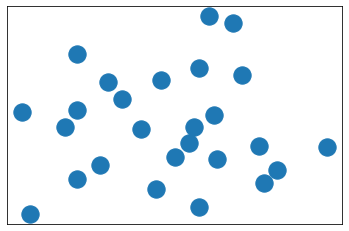

In [76]:
nx.draw_networkx(g)